The CRISP-DM Process (Cross Industry Process for Data Mining).

### 1. Business Understanding

1. What skill should you possess?

### 2. Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/developer_survey_2018/survey_results_public.csv')
schema = pd.read_csv('./data/developer_survey_2018/survey_results_schema.csv')

df.head()

/Users/fc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


### 3. Prepare Data

In [3]:
df_new = pd.read_pickle('./data/survey_results_public_cat.p')

df_new.shape

(98855, 887)

In [4]:
df_new.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,MilitaryUS_No,MilitaryUS_Yes,SurveyTooLong_The survey was an appropriate length,SurveyTooLong_The survey was too long,SurveyTooLong_The survey was too short,SurveyEasy_Neither easy nor difficult,SurveyEasy_Somewhat difficult,SurveyEasy_Somewhat easy,SurveyEasy_Very difficult,SurveyEasy_Very easy
0,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,...,0,0,1,0,0,0,0,0,0,1
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,...,0,0,1,0,0,0,0,1,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,1,0,0
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,...,0,0,1,0,0,0,0,1,0,0


### 4. Model Data

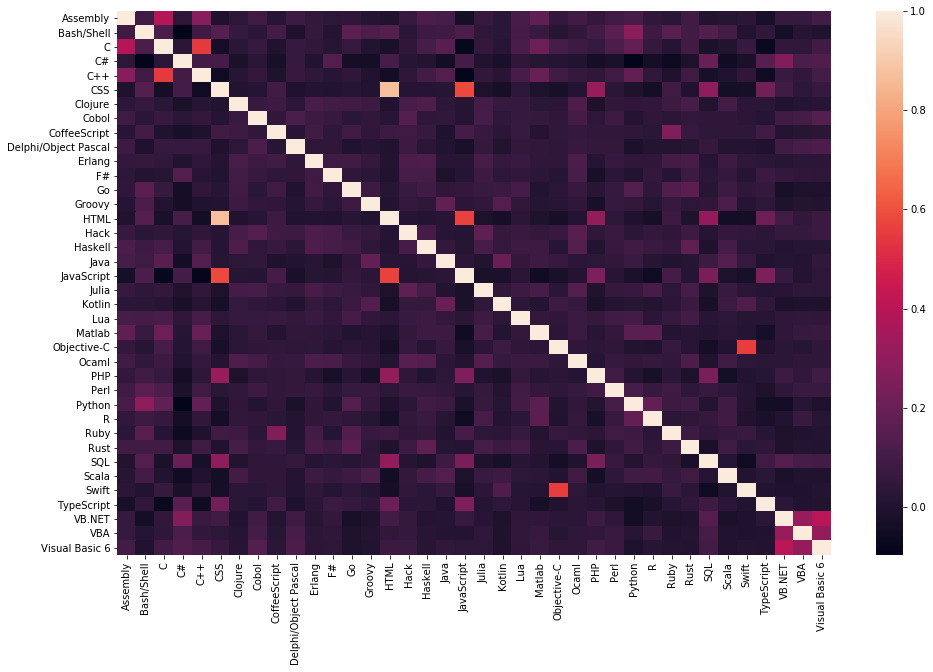

In [5]:
language = [col for col in df_new if col.startswith('LanguageWorkedWith_')]
_ = df_new[language]

plt.figure(figsize = (16,10))
sns.heatmap(_.corr(), xticklabels=[_[19:] for _ in language], yticklabels=[_[19:] for _ in language]);

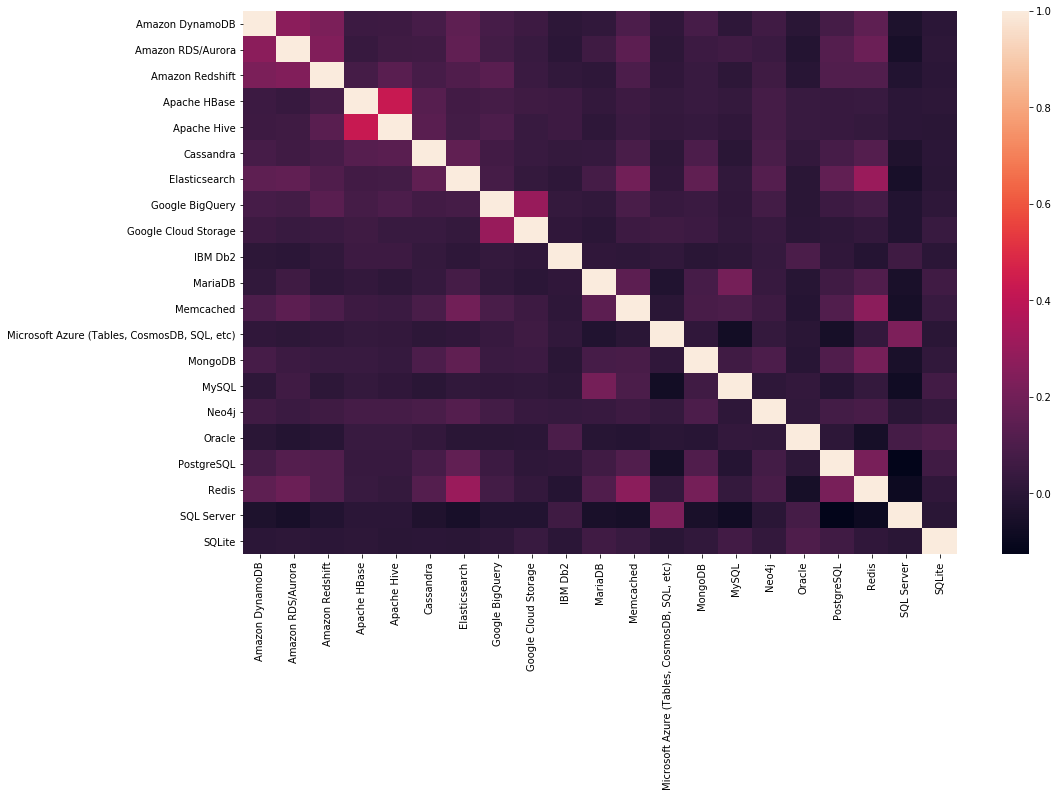

In [6]:
database = [col for col in df_new if col.startswith('DatabaseWorkedWith_')]
_ = df_new[database]

plt.figure(figsize = (16,10))
sns.heatmap(_.corr(), xticklabels=[_[19:] for _ in database], yticklabels=[_[19:] for _ in database]);

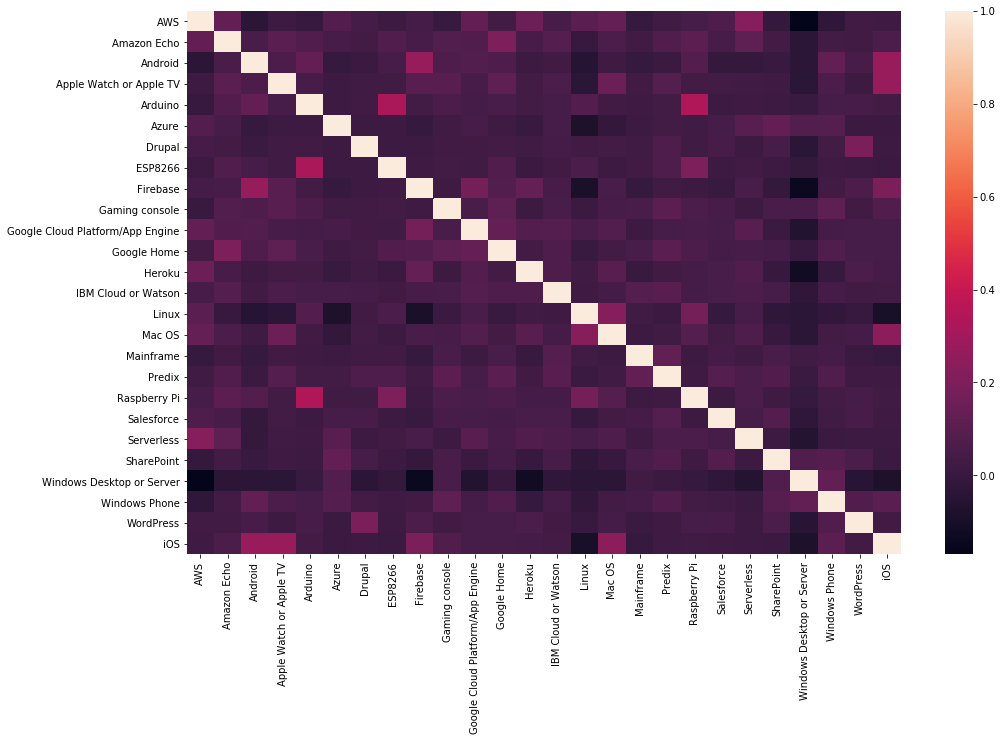

In [7]:
platform = [col for col in df_new if col.startswith('PlatformWorkedWith_')]
_ = df_new[platform]

plt.figure(figsize = (16,10))
sns.heatmap(_.corr(), xticklabels=[_[19:] for _ in platform], yticklabels=[_[19:] for _ in platform]);

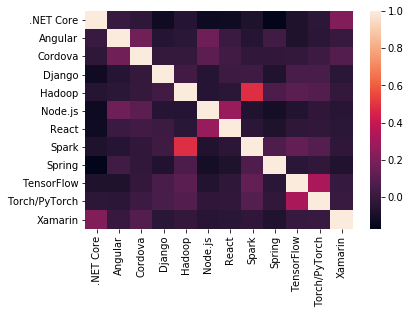

In [8]:
framework = [col for col in df_new if col.startswith('FrameworkWorkedWith_')]
_ = df_new[framework]

sns.heatmap(_.corr(), xticklabels=[_[20:] for _ in framework], yticklabels=[_[20:] for _ in framework]);

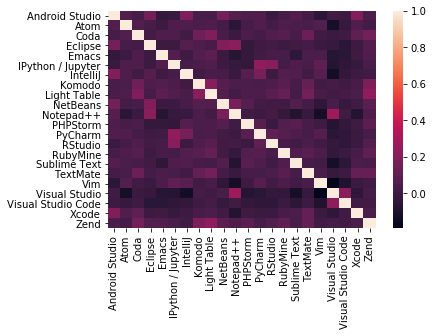

In [9]:
ide = [col for col in df_new if col.startswith('IDE_')]
_ = df_new[ide]

sns.heatmap(_.corr(), xticklabels=[_[4:] for _ in ide], yticklabels=[_[4:] for _ in ide]);

In [10]:
devtype = [col for col in df_new if col.startswith('DevType_')]

In [11]:
dt_lang_df = df_new[devtype + language]
dt_lang_df = dt_lang_df.dropna()

dt_lang_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VB.NET,LanguageWorkedWith_VBA,LanguageWorkedWith_Visual Basic 6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
dt_db_df = df_new[devtype + database]
dt_db_df = dt_db_df.dropna()

dt_db_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,DatabaseWorkedWith_Memcached,"DatabaseWorkedWith_Microsoft Azure (Tables, CosmosDB, SQL, etc)",DatabaseWorkedWith_MongoDB,DatabaseWorkedWith_MySQL,DatabaseWorkedWith_Neo4j,DatabaseWorkedWith_Oracle,DatabaseWorkedWith_PostgreSQL,DatabaseWorkedWith_Redis,DatabaseWorkedWith_SQL Server,DatabaseWorkedWith_SQLite
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
dt_pf_df = df_new[devtype + platform]
dt_pf_df = dt_pf_df.dropna()

dt_pf_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,PlatformWorkedWith_Mainframe,PlatformWorkedWith_Predix,PlatformWorkedWith_Raspberry Pi,PlatformWorkedWith_Salesforce,PlatformWorkedWith_Serverless,PlatformWorkedWith_SharePoint,PlatformWorkedWith_Windows Desktop or Server,PlatformWorkedWith_Windows Phone,PlatformWorkedWith_WordPress,PlatformWorkedWith_iOS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
dt_fw_df = df_new[devtype + framework]
dt_fw_df = dt_fw_df.dropna()

dt_fw_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,FrameworkWorkedWith_Cordova,FrameworkWorkedWith_Django,FrameworkWorkedWith_Hadoop,FrameworkWorkedWith_Node.js,FrameworkWorkedWith_React,FrameworkWorkedWith_Spark,FrameworkWorkedWith_Spring,FrameworkWorkedWith_TensorFlow,FrameworkWorkedWith_Torch/PyTorch,FrameworkWorkedWith_Xamarin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dt_ide_df = df_new[devtype + ide]
dt_ide_df = dt_ide_df.dropna()

dt_ide_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,IDE_PyCharm,IDE_RStudio,IDE_RubyMine,IDE_Sublime Text,IDE_TextMate,IDE_Vim,IDE_Visual Studio,IDE_Visual Studio Code,IDE_Xcode,IDE_Zend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 5. Results

#### 5.1 Language

<Figure size 1440x1440 with 0 Axes>

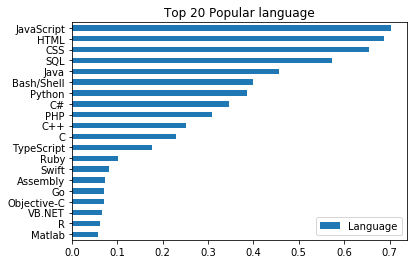

In [16]:
_ = pd.DataFrame()
_['Language'] = dt_lang_df[language].sum()/dt_lang_df.shape[0]
_.index = _.index.str.slice(19)

plt.figure(figsize = (20,20))
_.sort_values(by='Language')[-20:].plot(kind='barh')
plt.title('Top 20 Popular language')
plt.show()

In [17]:
dt_lang_perc = pd.DataFrame()
for dt in devtype:
    dt_lang_perc[dt] = dt_lang_df[dt_lang_df[dt] == 1][language].sum()/dt_lang_df[dt_lang_df[dt] == 1].shape[0]

dt_lang_perc.columns = dt_lang_perc.columns.str.slice(8)
dt_lang_perc.index = dt_lang_perc.index.str.slice(19)
dt_lang_perc.style.bar()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
Assembly,0.0696783,0.11324,0.0766116,0.106564,0.0837701,0.0957693,0.094319,0.0698622,0.148452,0.262377,0.0921082,0.0628562,0.058216,0.154104,0.108527,0.0840013,0.0847458,0.0892757,0.161918,0.100867
Bash/Shell,0.43462,0.504276,0.422921,0.517956,0.482722,0.376847,0.384341,0.688796,0.524637,0.545085,0.52627,0.39222,0.437624,0.409138,0.396456,0.329785,0.483598,0.501965,0.38405,0.650681
C,0.219825,0.283955,0.209436,0.313012,0.241006,0.269621,0.274945,0.22169,0.38945,0.671131,0.259837,0.193926,0.186349,0.391327,0.229236,0.268676,0.235101,0.256223,0.420615,0.286277
C#,0.386499,0.372562,0.383214,0.253382,0.427201,0.391619,0.596795,0.343919,0.283323,0.379574,0.3592,0.386828,0.414327,0.52762,0.328904,0.36672,0.392564,0.387048,0.316975,0.344929
C++,0.244904,0.292508,0.232015,0.365626,0.259927,0.29997,0.353969,0.222888,0.418193,0.635733,0.279622,0.215833,0.20785,0.53459,0.255814,0.287977,0.257791,0.28411,0.439018,0.283688
CSS,0.703053,0.757441,0.645282,0.524303,0.792751,0.810974,0.664967,0.690953,0.629501,0.504664,0.673115,0.863607,0.82308,0.67811,0.809524,0.64059,0.74877,0.70335,0.670918,0.763031
Clojure,0.0157967,0.0277113,0.0143258,0.0227159,0.0137692,0.0107527,0.0111435,0.0264829,0.0252685,0.0141115,0.0257199,0.0117727,0.0159275,0.0165204,0.0354374,0.0100673,0.020503,0.0134756,0.0108968,0.0165485
Cobol,0.00799805,0.0222374,0.0211772,0.0125271,0.0129697,0.0139684,0.0134741,0.00994608,0.0154769,0.0138723,0.0131897,0.00778024,0.00734304,0.0110996,0.0354374,0.00872074,0.0164024,0.0132884,0.00710308,0.0129461
CoffeeScript,0.0388382,0.0797126,0.0331672,0.0332387,0.0438838,0.039996,0.0249818,0.0609946,0.0407454,0.0298972,0.0688063,0.0469203,0.0488391,0.0379453,0.0697674,0.0332799,0.0606889,0.0451057,0.0226814,0.0526849
Delphi/Object Pascal,0.0274725,0.056791,0.0459358,0.0273927,0.0525007,0.0430108,0.0726875,0.0279209,0.0382186,0.0554891,0.0408881,0.0274356,0.0249082,0.0402685,0.0819491,0.0328952,0.0639694,0.0374322,0.0210671,0.0434538


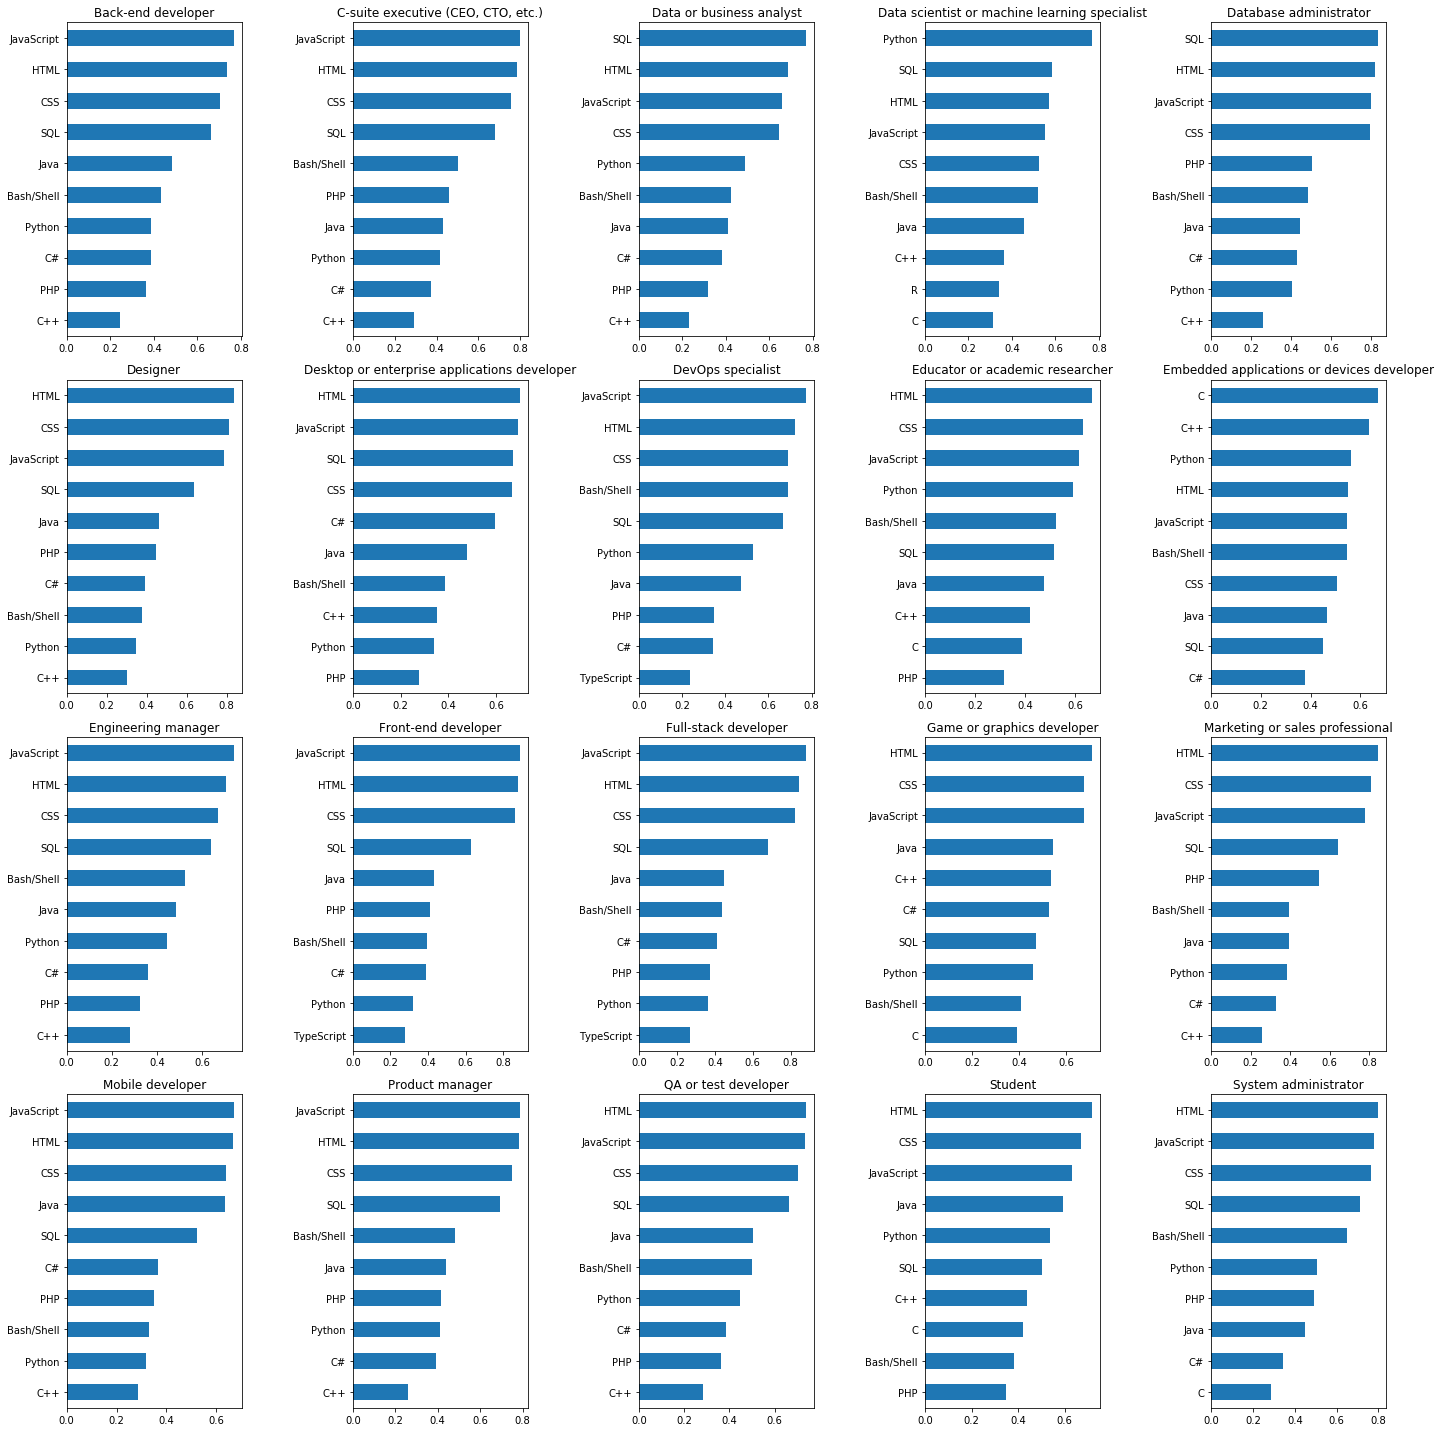

In [18]:
plt.figure(figsize=(20, 20))
for i, dt in enumerate(devtype):
    plt.subplot(4, 5, i+1)
    dt_lang_perc[dt[8:]].sort_values()[-10:].plot(kind='barh', title=dt[8:])
    
plt.tight_layout()

#### 5.2 Database

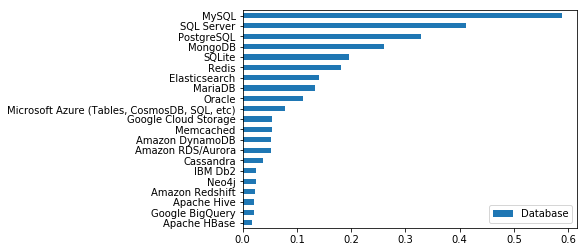

In [19]:
_ = pd.DataFrame()
_['Database'] = dt_db_df[database].sum()/dt_db_df.shape[0]
_.index = _.index.str.slice(19)

_.sort_values(by='Database').plot(kind='barh')
plt.show()

In [20]:
dt_db_perc = pd.DataFrame()
for dt in devtype:
    dt_db_perc[dt] = dt_db_df[dt_db_df[dt] == 1][database].sum()/dt_db_df[dt_db_df[dt] == 1].shape[0]

dt_db_perc.columns = dt_db_perc.columns.str.slice(8)
dt_db_perc.index = dt_db_perc.index.str.slice(19, 34)
dt_db_perc.style.bar()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
Amazon DynamoDB,0.0588643,0.0949227,0.0521262,0.0706095,0.0541931,0.0402824,0.0358159,0.11761,0.037037,0.0463347,0.102464,0.0474465,0.0593996,0.0509915,0.0835476,0.0496611,0.0745823,0.0536176,0.0270388,0.066384
Amazon RDS/Auro,0.0593419,0.118837,0.0528121,0.0681955,0.0747681,0.0349577,0.0282845,0.133941,0.0428631,0.041148,0.126128,0.0436706,0.0601571,0.0389518,0.0886889,0.0406733,0.0865155,0.0590009,0.0204148,0.091702
Amazon Redshift,0.0229248,0.0393672,0.0428669,0.0671897,0.0262699,0.0114597,0.010795,0.0422838,0.0237203,0.0172891,0.0517199,0.0137305,0.0195286,0.0212465,0.0604113,0.0134816,0.0352029,0.0215332,0.00868715,0.0250757
Apache HBase,0.0172891,0.0250184,0.0360082,0.0589419,0.0190135,0.0175946,0.0133054,0.0226611,0.0245526,0.019018,0.0275677,0.0107556,0.0124018,0.023017,0.0514139,0.0110443,0.0208831,0.0202412,0.020089,0.0213204
Apache Hive,0.0200115,0.0294334,0.0634431,0.107222,0.0221365,0.015048,0.0138075,0.0278516,0.0357886,0.0152144,0.0339107,0.0100309,0.0138608,0.0254958,0.0398458,0.0122629,0.025358,0.0195952,0.0174829,0.0196245
Cassandra,0.0432706,0.0647535,0.0471536,0.0744317,0.0356388,0.028244,0.0285356,0.073427,0.0395339,0.0435685,0.0624543,0.0246386,0.0348204,0.0290368,0.0552699,0.0245259,0.0447494,0.0387597,0.0226952,0.040218
Elasticsearch,0.165226,0.214496,0.127743,0.179038,0.138514,0.0848478,0.0979916,0.294088,0.111527,0.093361,0.240546,0.123918,0.161616,0.0733003,0.132391,0.0911722,0.176313,0.140181,0.057118,0.18086
Google BigQuery,0.0208711,0.0526122,0.0389232,0.0647757,0.0242491,0.0178261,0.0151464,0.0377263,0.0374532,0.0325035,0.0519639,0.0161715,0.0195286,0.0308074,0.0874036,0.0214792,0.0408711,0.0269165,0.0173743,0.0294367
Google Cloud St,0.0490735,0.104489,0.0680727,0.0967612,0.0590613,0.0728094,0.0457741,0.0660843,0.0790678,0.0760719,0.0797756,0.056562,0.0518799,0.0938385,0.141388,0.106101,0.0924821,0.0667528,0.0746009,0.0671108
IBM Db2,0.0273188,0.0334805,0.0519547,0.0323878,0.028658,0.0305591,0.0388285,0.0348145,0.028298,0.0297372,0.0317151,0.0234181,0.0252806,0.0226629,0.0539846,0.0228502,0.0349045,0.0325151,0.0148768,0.0300424


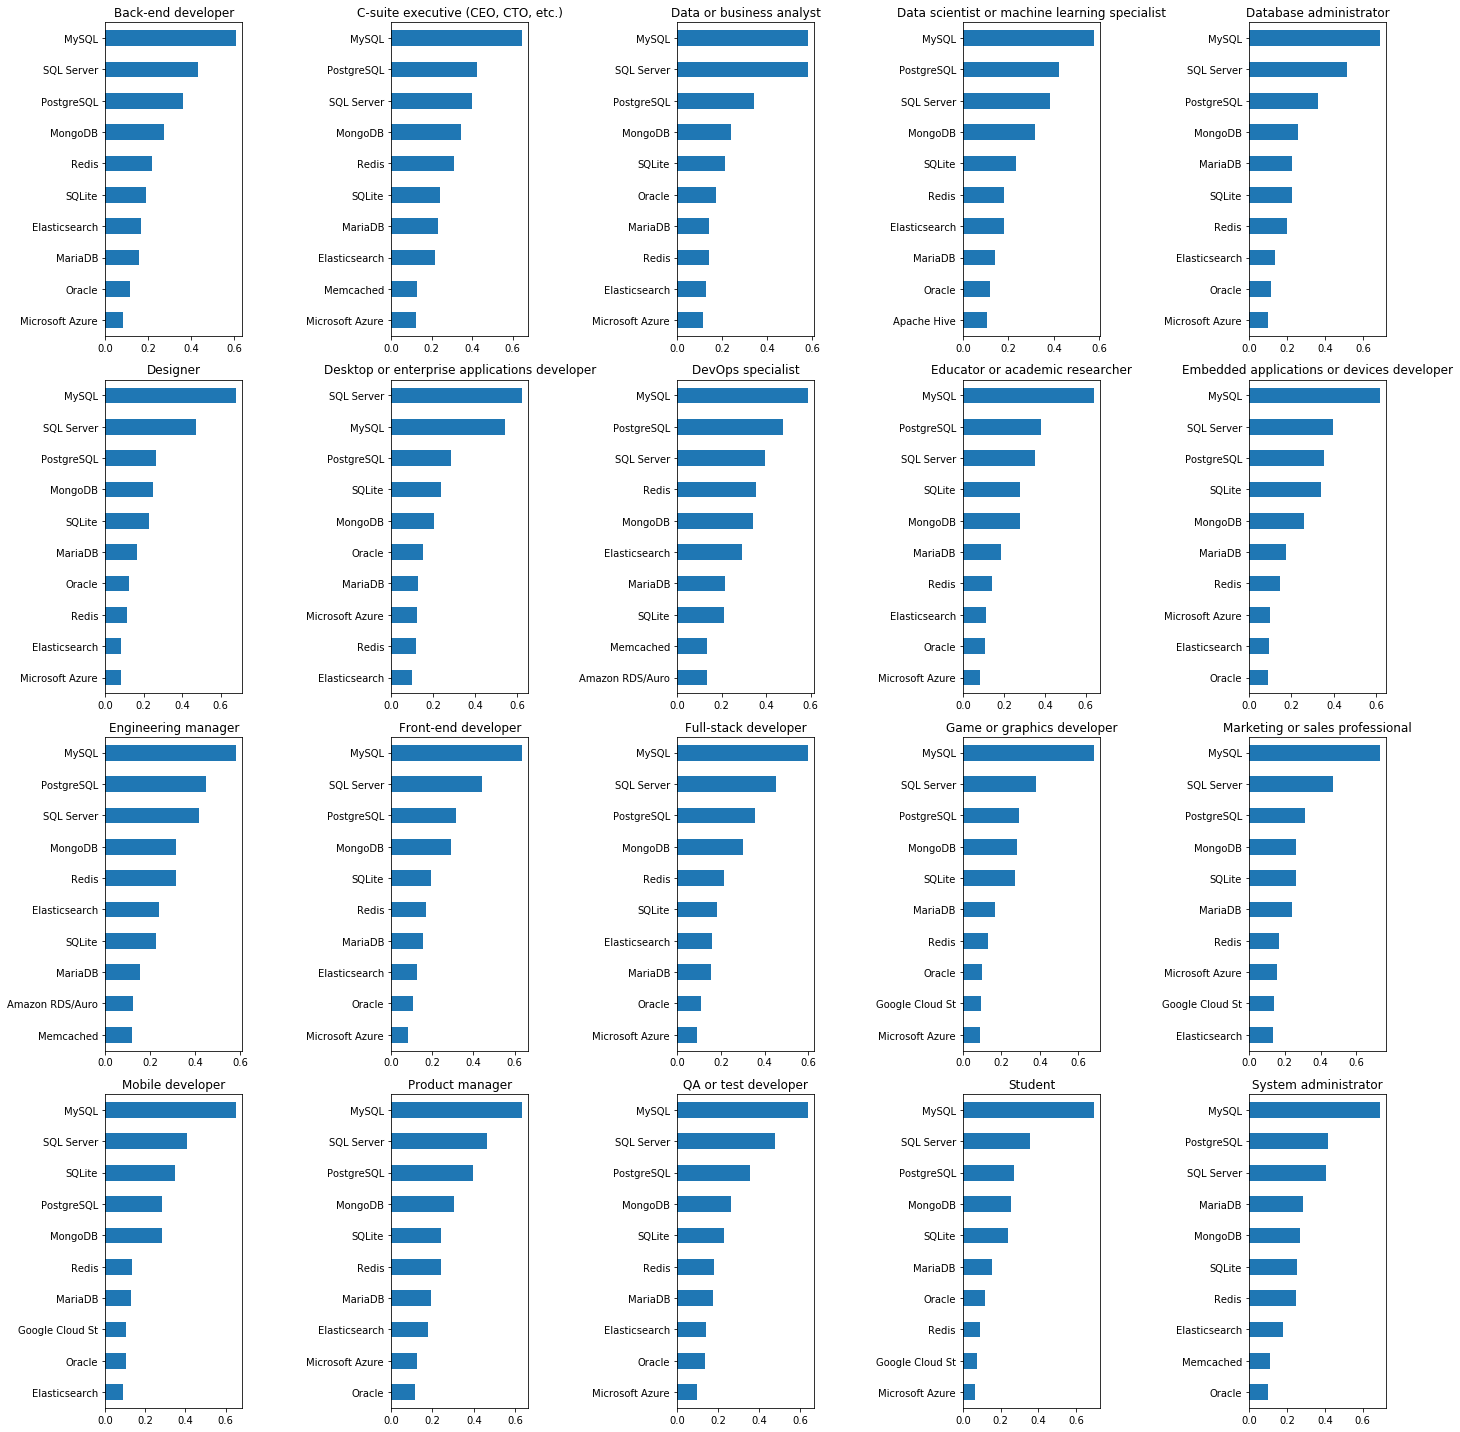

In [21]:
plt.figure(figsize=(20, 20))
for i, dt in enumerate(devtype):
    plt.subplot(4, 5, i+1)
    dt_db_perc[dt[8:]].sort_values()[-10:].plot(kind='barh', title=dt[8:])
    
plt.tight_layout()

#### 5.3 Platform

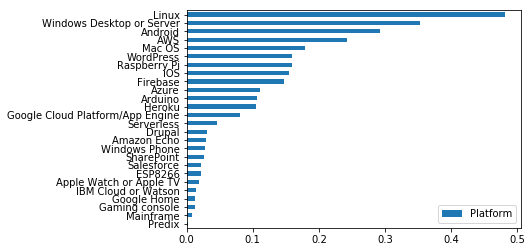

In [22]:
_ = pd.DataFrame()
_['Platform'] = dt_pf_df[platform].sum()/dt_pf_df.shape[0]
_.index = _.index.str.slice(19)

_.sort_values(by='Platform').plot(kind='barh')
plt.show()

In [23]:
dt_pf_perc = pd.DataFrame()
for dt in devtype:
    dt_pf_perc[dt] = dt_pf_df[dt_pf_df[dt] == 1][platform].sum()/dt_pf_df[dt_pf_df[dt] == 1].shape[0]

dt_pf_perc.columns = dt_pf_perc.columns.str.slice(8)
dt_pf_perc.index = dt_pf_perc.index.str.slice(19)
dt_pf_perc.style.bar()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
AWS,0.282492,0.406602,0.248382,0.302767,0.280257,0.175414,0.158351,0.447073,0.184026,0.159443,0.395062,0.239516,0.298914,0.148796,0.257812,0.197898,0.324572,0.243307,0.122038,0.30755
Amazon Echo,0.0309812,0.0626407,0.0392082,0.0422137,0.033273,0.032307,0.0249479,0.0491146,0.0327567,0.0461816,0.0496248,0.032262,0.0342971,0.0346904,0.09375,0.0356731,0.0531785,0.038338,0.0300387,0.0361535
Android,0.27691,0.381095,0.263989,0.262573,0.32107,0.36774,0.313493,0.238723,0.311005,0.388287,0.312031,0.322822,0.288512,0.485665,0.393229,0.693184,0.360636,0.313772,0.385546,0.297836
Apple Watch or Apple TV,0.0128533,0.0468867,0.0213171,0.019188,0.0179936,0.0279916,0.01837,0.0174486,0.0213471,0.0265738,0.0346163,0.0185395,0.0148998,0.0412844,0.0677083,0.0622584,0.0427873,0.0261298,0.0188361,0.0205362
Arduino,0.105797,0.15904,0.114008,0.15815,0.133997,0.138325,0.122894,0.112834,0.181818,0.318111,0.135318,0.107108,0.103075,0.193234,0.140625,0.130417,0.130807,0.125509,0.205115,0.156419
Azure,0.130146,0.175919,0.153978,0.120986,0.1347,0.0980872,0.155142,0.185989,0.0839161,0.0872033,0.1542,0.122126,0.146306,0.0756881,0.157552,0.10017,0.175428,0.116085,0.0598791,0.116945
Drupal,0.0338232,0.0562641,0.0413019,0.0302969,0.0476478,0.0451365,0.0212578,0.0431692,0.0375414,0.0307018,0.0423626,0.0434343,0.0385192,0.0335436,0.09375,0.0274669,0.0574572,0.0432641,0.0208189,0.0538613
ESP8266,0.0232999,0.0375094,0.0237914,0.029287,0.0284479,0.0271752,0.0247874,0.0307613,0.0360692,0.101909,0.033648,0.0211302,0.022365,0.0280963,0.0455729,0.0247542,0.028423,0.0250589,0.0351938,0.0402115
Firebase,0.126511,0.214929,0.11515,0.112906,0.142441,0.175881,0.0967431,0.110379,0.134339,0.118421,0.158073,0.175882,0.150834,0.163704,0.223958,0.359037,0.19835,0.133862,0.155844,0.11547
Gaming console,0.0106514,0.0315079,0.0180815,0.0208039,0.015581,0.0216935,0.0182095,0.0144759,0.0272359,0.0294118,0.0229969,0.0131962,0.0105553,0.0974771,0.0546875,0.0200068,0.0244499,0.0214179,0.0224051,0.0196754


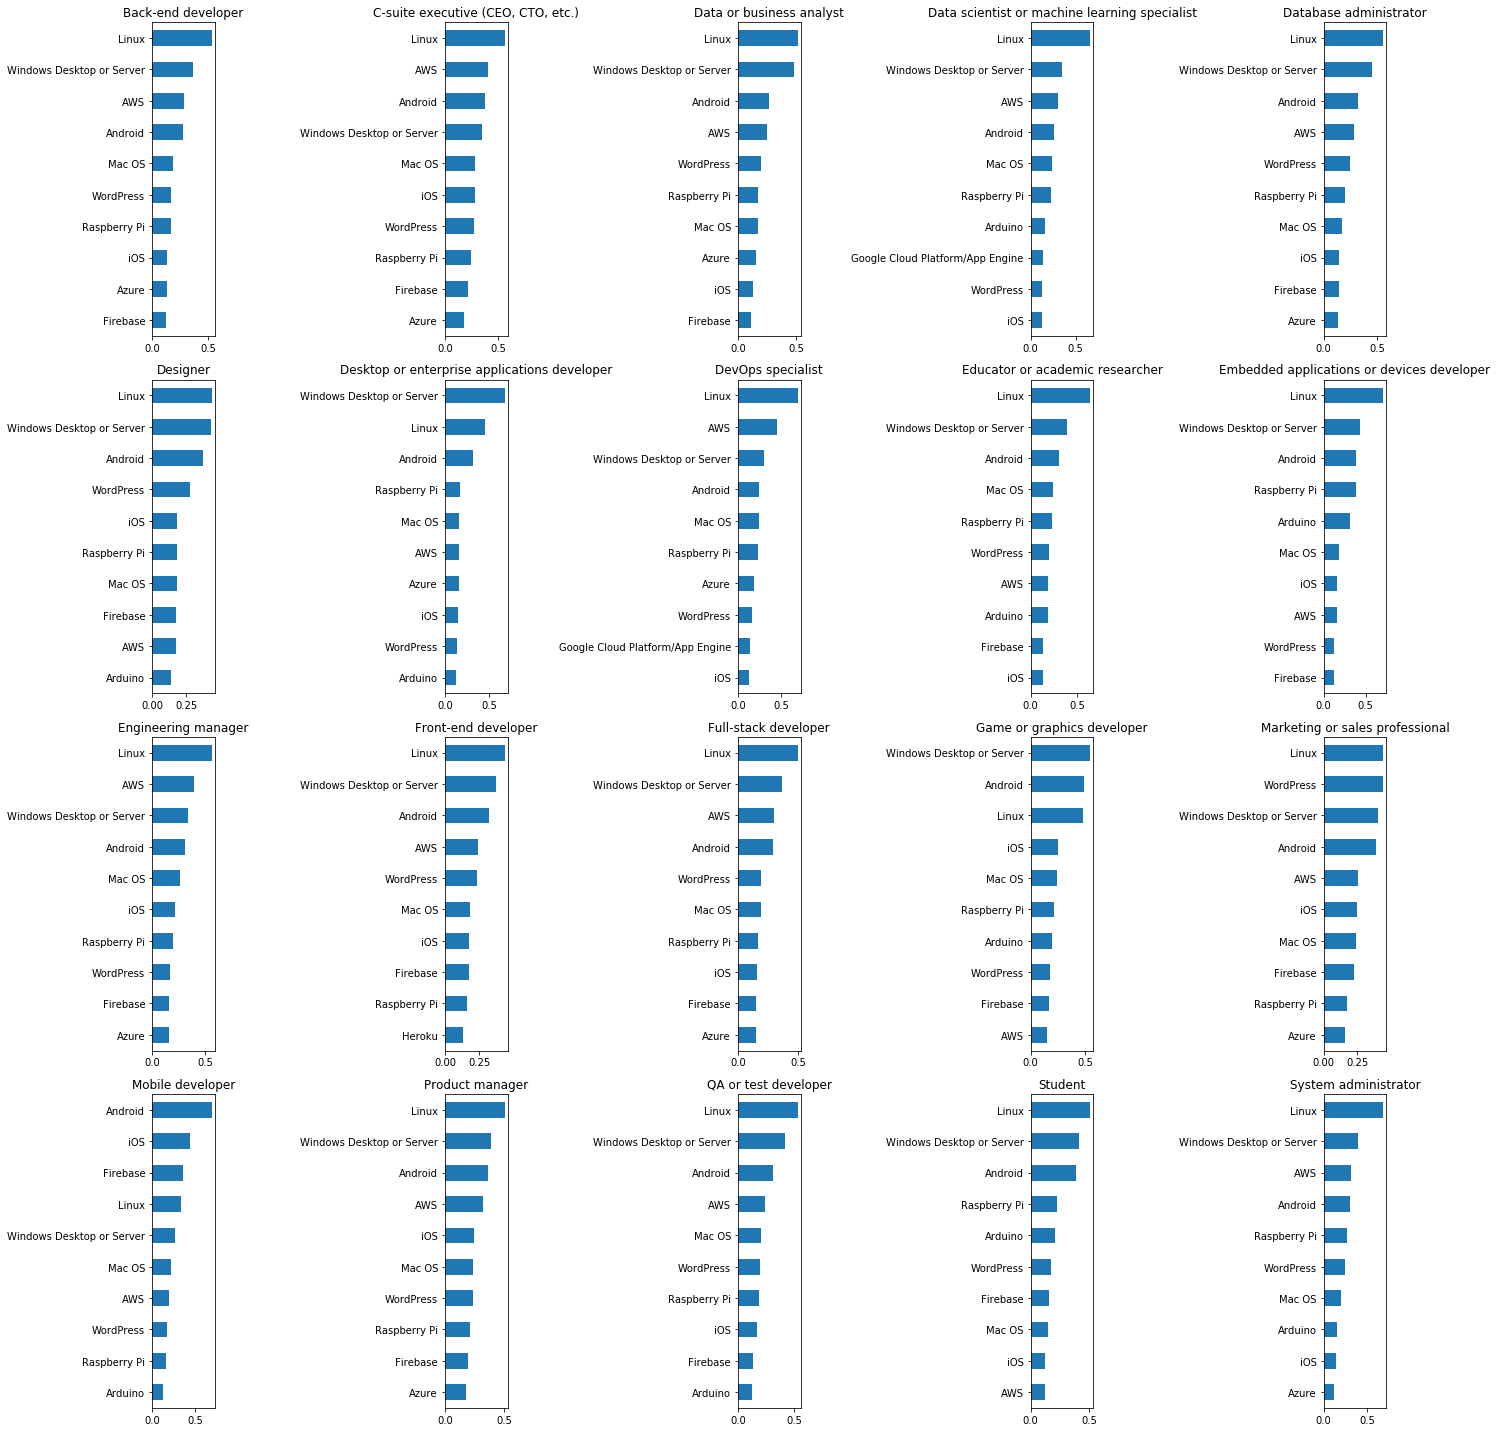

In [24]:
plt.figure(figsize=(20, 20))
for i, dt in enumerate(devtype):
    plt.subplot(4, 5, i+1)
    dt_pf_perc[dt[8:]].sort_values()[-10:].plot(kind='barh', title=dt[8:])
    
plt.tight_layout()

#### 5.4 Framework

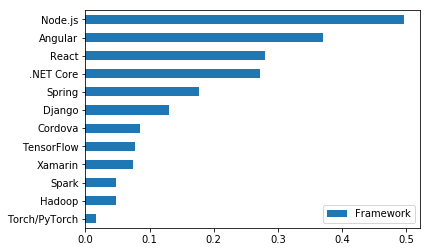

In [25]:
_ = pd.DataFrame()
_['Framework'] = dt_fw_df[framework].sum()/dt_fw_df.shape[0]
_.index = _.index.str.slice(20)

_.sort_values(by='Framework').plot(kind='barh')
plt.show()

In [26]:
dt_fw_perc = pd.DataFrame()
for dt in devtype:
    dt_fw_perc[dt] = dt_fw_df[dt_fw_df[dt] == 1][framework].sum()/dt_fw_df[dt_fw_df[dt] == 1].shape[0]

dt_fw_perc.columns = dt_fw_perc.columns.str.slice(8)
dt_fw_perc.index = dt_fw_perc.index.str.slice(20)
dt_fw_perc.style.bar()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
.NET Core,0.288575,0.293735,0.346107,0.192641,0.344466,0.320867,0.496324,0.260801,0.230117,0.36391,0.275158,0.270538,0.288006,0.372622,0.312614,0.279802,0.304981,0.310163,0.268021,0.280875
Angular,0.383144,0.387935,0.326946,0.233185,0.377607,0.396581,0.369419,0.389317,0.320255,0.288114,0.370682,0.470181,0.457641,0.29694,0.369287,0.393003,0.400383,0.372196,0.280434,0.339582
Cordova,0.0865785,0.1471,0.0882852,0.0623389,0.111068,0.121203,0.0936601,0.0915947,0.0965005,0.122308,0.10754,0.114362,0.103265,0.136063,0.164534,0.20692,0.145594,0.0985876,0.0788546,0.108535
Django,0.138624,0.171694,0.168809,0.211155,0.155726,0.115555,0.0921684,0.189474,0.195122,0.163652,0.156503,0.107438,0.126358,0.122829,0.153565,0.111456,0.16092,0.157297,0.170405,0.201447
Hadoop,0.0480345,0.0538283,0.130002,0.190532,0.0511836,0.0323615,0.0327118,0.0659859,0.078473,0.0361757,0.0600781,0.0214876,0.0329512,0.0355666,0.0658135,0.0275247,0.051341,0.0418167,0.0479616,0.0475251
Node.js,0.498561,0.600928,0.444094,0.377314,0.545361,0.570142,0.43431,0.576905,0.493107,0.484927,0.559027,0.608532,0.567724,0.588503,0.595978,0.557472,0.57931,0.54057,0.510509,0.574248
React,0.268246,0.350348,0.195246,0.190298,0.25016,0.266982,0.188918,0.311548,0.242842,0.204134,0.343346,0.365513,0.336296,0.255583,0.340037,0.312464,0.316092,0.259208,0.219072,0.267061
Spark,0.0491673,0.0547564,0.117875,0.22217,0.04389,0.0286979,0.0291955,0.0614297,0.0811241,0.037037,0.0657855,0.0194327,0.030779,0.0306038,0.0639854,0.0244233,0.0490421,0.0354472,0.0433065,0.0406183
Spring,0.213201,0.125754,0.153044,0.130068,0.131798,0.133262,0.180501,0.216811,0.137328,0.114556,0.185942,0.139558,0.179862,0.101737,0.0987203,0.147122,0.142912,0.172528,0.129214,0.126788
TensorFlow,0.0639848,0.116473,0.148921,0.434966,0.065643,0.0606014,0.0537027,0.0772977,0.234358,0.153316,0.0922199,0.0432432,0.053103,0.117039,0.104205,0.0725916,0.0969349,0.0639712,0.146142,0.0804144


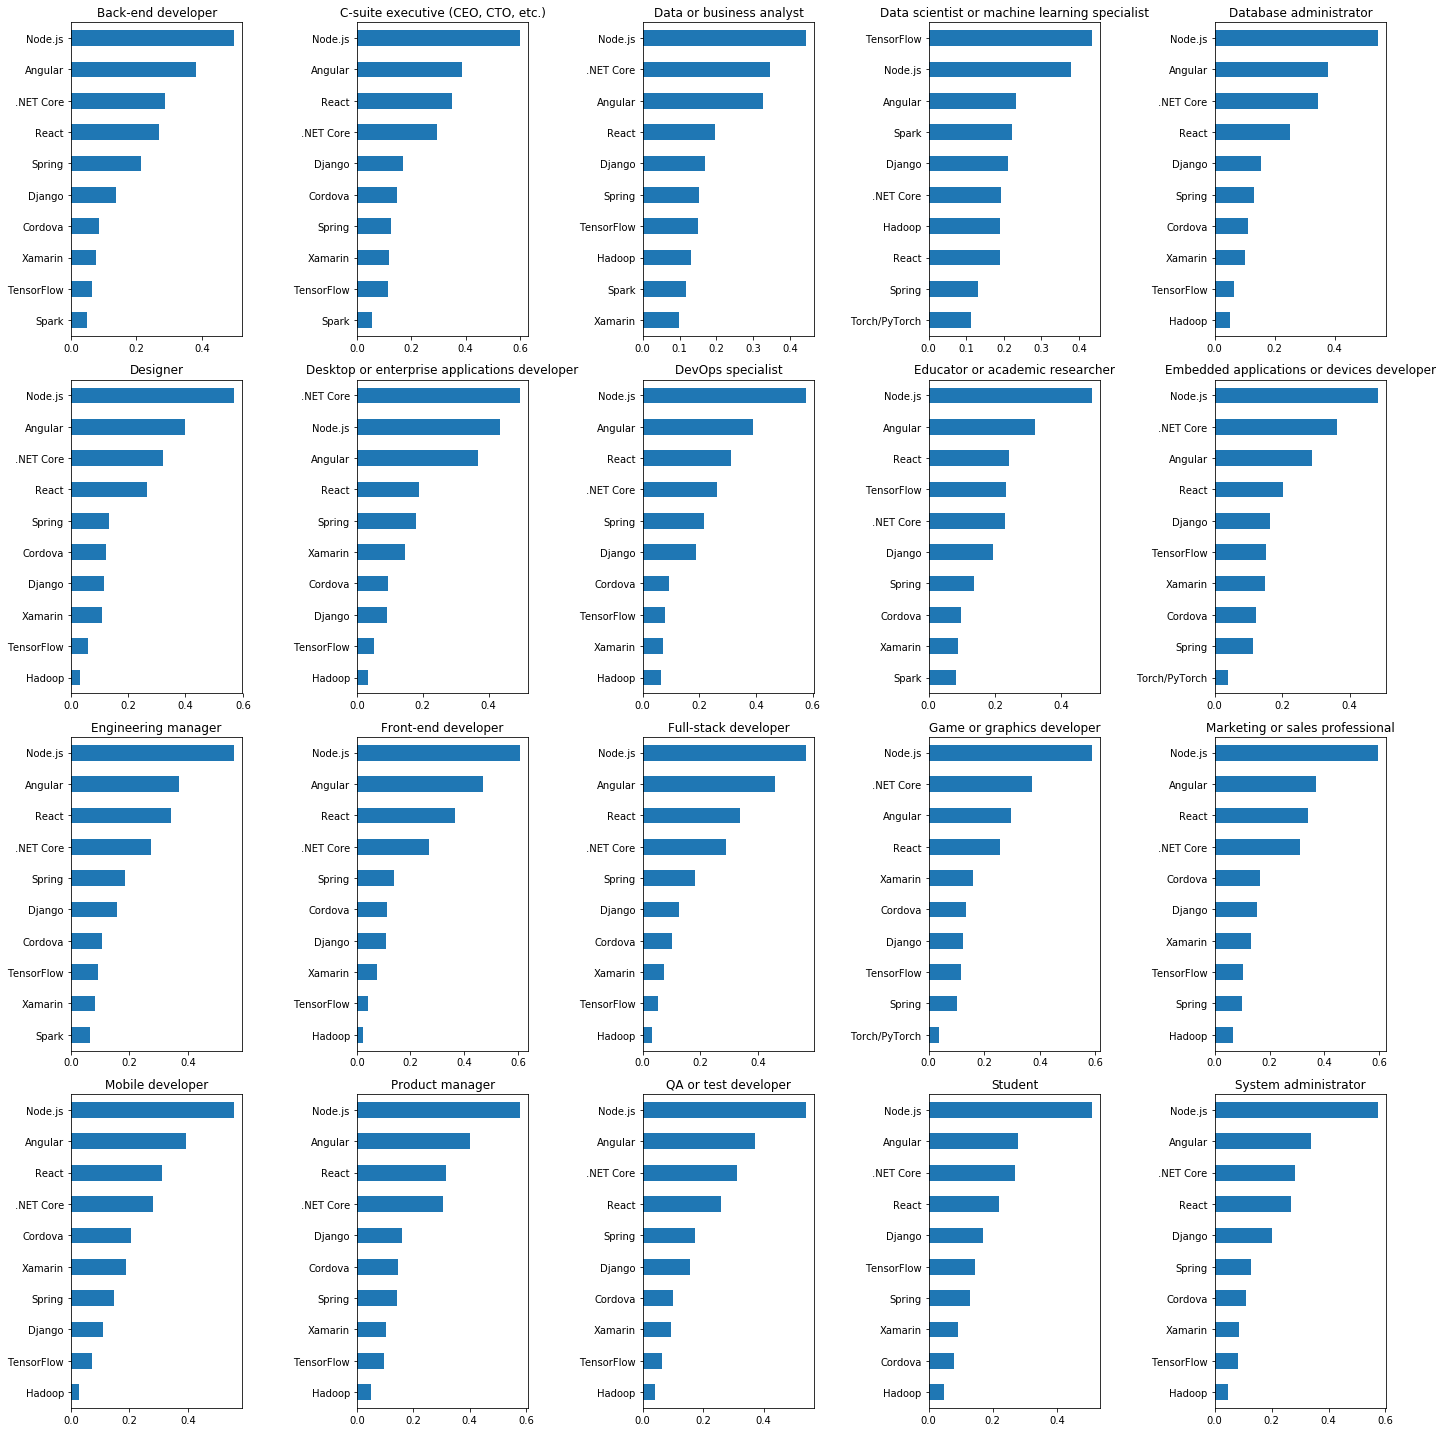

In [27]:
plt.figure(figsize=(20, 20))
for i, dt in enumerate(devtype):
    plt.subplot(4, 5, i+1)
    dt_fw_perc[dt[8:]].sort_values()[-10:].plot(kind='barh', title=dt[8:])
    
plt.tight_layout()

#### 5.5 IDE

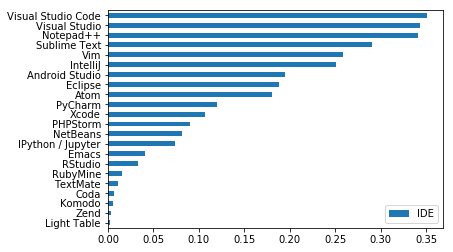

In [28]:
_ = pd.DataFrame()
_['IDE'] = dt_ide_df[ide].sum()/dt_ide_df.shape[0]
_.index = _.index.str.slice(4)

_.sort_values(by='IDE').plot(kind='barh')
plt.show()

In [29]:
dt_ide_perc = pd.DataFrame()
for dt in devtype:
    dt_ide_perc[dt] = dt_ide_df[dt_ide_df[dt] == 1][ide].sum()/dt_ide_df[dt_ide_df[dt] == 1].shape[0]

dt_ide_perc.columns = dt_ide_perc.columns.str.slice(8)
dt_ide_perc.index = dt_ide_perc.index.str.slice(4)
dt_ide_perc.style.bar()

,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,Embedded applications or devices developer,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
Android Studio,0.180379,0.24186,0.175016,0.16413,0.218182,0.252447,0.208525,0.154336,0.216856,0.28081,0.205542,0.197959,0.176936,0.330003,0.271547,0.566186,0.232585,0.211016,0.281763,0.201441
Atom,0.177612,0.217531,0.171926,0.208059,0.185325,0.216248,0.127197,0.199902,0.225284,0.156829,0.19782,0.20919,0.194981,0.198218,0.272727,0.202724,0.207563,0.197828,0.240061,0.204115
Coda,0.0062673,0.022898,0.0144763,0.0153926,0.0106138,0.014206,0.00678989,0.00747183,0.0171799,0.0138306,0.0138542,0.00882955,0.00636873,0.015663,0.0578512,0.0118355,0.0218937,0.011249,0.00871257,0.0109264
Eclipse,0.197992,0.158855,0.220722,0.183501,0.19114,0.232453,0.236364,0.159971,0.211021,0.318103,0.197365,0.17864,0.180094,0.220362,0.206612,0.20689,0.198465,0.245927,0.230925,0.179589
Emacs,0.0415609,0.0608229,0.0448926,0.0837081,0.0353484,0.032937,0.0367409,0.0622244,0.0975689,0.077797,0.0656371,0.027972,0.0347014,0.0494194,0.0484061,0.0263819,0.0474837,0.0444143,0.0415327,0.0571894
IPython / Jupyter,0.0636108,0.0801431,0.182661,0.386544,0.064144,0.0492476,0.0449642,0.0854973,0.211021,0.0948382,0.0883489,0.0384262,0.0526373,0.0594113,0.108619,0.0387464,0.0756326,0.0649728,0.113263,0.0750901
IntelliJ,0.284087,0.236852,0.198601,0.273781,0.210152,0.196675,0.229951,0.306957,0.227229,0.212151,0.280491,0.230557,0.259158,0.244126,0.167651,0.314864,0.218937,0.261831,0.290137,0.223062
Komodo,0.0058327,0.0207513,0.0141509,0.0121065,0.010706,0.0127328,0.00882686,0.00930916,0.0158833,0.0133366,0.0122644,0.00674578,0.00590605,0.0153929,0.042503,0.00766993,0.0139323,0.011443,0.00871257,0.0117401
Light Table,0.00185274,0.0100179,0.00683149,0.00605327,0.00378403,0.00463012,0.00362127,0.00477707,0.0100486,0.00839714,0.00772201,0.00204846,0.00190518,0.00918174,0.0318772,0.00310764,0.00881433,0.00543057,0.00397564,0.00464954
NetBeans,0.0908072,0.101252,0.111906,0.0828433,0.12838,0.135115,0.109091,0.0576923,0.125446,0.115337,0.0815353,0.0929575,0.0792553,0.120173,0.154664,0.108503,0.0941143,0.10512,0.136694,0.101709


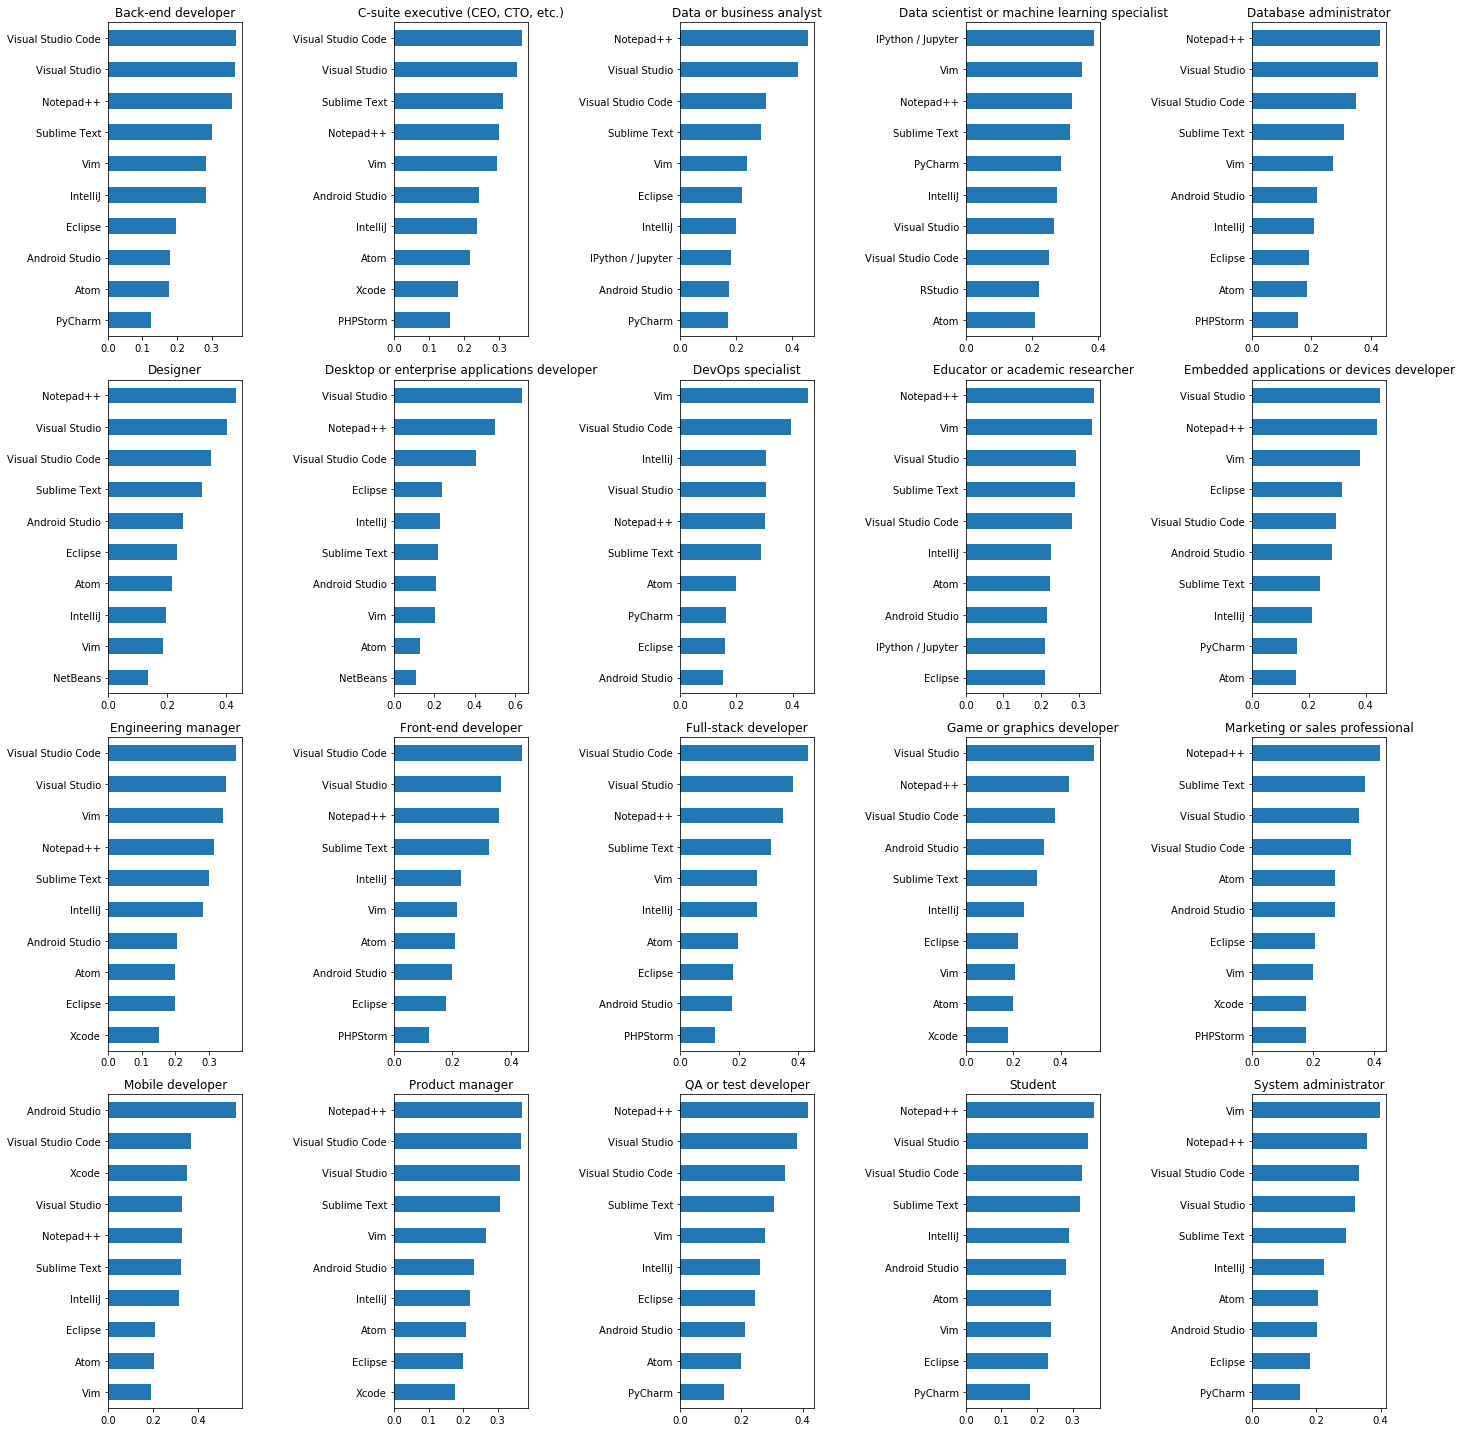

In [30]:
plt.figure(figsize=(20, 20))
for i, dt in enumerate(devtype):
    plt.subplot(4, 5, i+1)
    dt_ide_perc[dt[8:]].sort_values()[-10:].plot(kind='barh', title=dt[8:])
    
plt.tight_layout()

### 6. Deploy

From the result, we can find that Javascript is the most popular language. MySQL is the most popular database. Linux is the most popular platform. Node.js is the most popular framework. Visual Studio Code is the most popular IDE. We also survery each skill set for each job type. You can take it for reference.